In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [3]:
df = pd.read_csv("original_file.csv") 
df.head(10)


,IMAGE,FIX_INDEX,FIX_DURATION,FIX_X,FIX_Y,FIX_PUPIL,source_file,numeric_id,label,image_id
0,outman_054.jpg,1,205,518.5,371.3,1177,000.xlsx,0,0,53
1,outman_054.jpg,2,90,275.1,282.2,1262,000.xlsx,0,0,53
2,outman_054.jpg,3,305,600.3,271.1,1265,000.xlsx,0,0,53
3,outman_054.jpg,4,269,635.2,269.2,1326,000.xlsx,0,0,53
4,outman_054.jpg,5,318,597.3,266.0,1366,000.xlsx,0,0,53
5,outman_054.jpg,6,585,575.4,269.3,1442,000.xlsx,0,0,53
6,outman_054.jpg,7,531,610.9,274.1,1508,000.xlsx,0,0,53
7,outman_054.jpg,8,336,595.0,333.7,1577,000.xlsx,0,0,53
8,outman_054.jpg,9,400,597.8,599.6,1687,000.xlsx,0,0,53
9,outman_054.jpg,10,325,550.1,580.0,1756,000.xlsx,0,0,53


In [4]:
df.describe()

,FIX_INDEX,FIX_DURATION,FIX_X,FIX_Y,FIX_PUPIL,numeric_id,label,image_id
count,225159.000000,225159.000000,225159.000000,225159.000000,225159.000000,225159.000000,225159.000000,225159.000000
mean,8.191451,291.955667,514.751147,395.808575,1253.202497,142.763834,0.460364,49.630563
std,4.896017,258.334214,198.603991,145.309891,637.554366,105.218982,0.498428,29.045198
min,1.000000,0.000000,-1001.000000,-734.000000,189.000000,0.000000,0.000000,0.000000
25%,4.000000,171.000000,391.500000,299.200000,781.000000,44.000000,0.000000,24.000000
50%,8.000000,242.000000,514.900000,389.400000,1149.000000,94.000000,0.000000,49.000000
75%,12.000000,344.000000,641.000000,487.000000,1622.000000,248.000000,1.000000,75.000000
max,39.000000,5001.000000,2034.600000,1484.700000,4141.000000,303.000000,1.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225159 entries, 0 to 225158
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   IMAGE         225159 non-null  object 
 1   FIX_INDEX     225159 non-null  int64  
 2   FIX_DURATION  225159 non-null  int64  
 3   FIX_X         225159 non-null  float64
 4   FIX_Y         225159 non-null  float64
 5   FIX_PUPIL     225159 non-null  int64  
 6   source_file   225159 non-null  object 
 7   numeric_id    225159 non-null  int64  
 8   label         225159 non-null  int64  
 9   image_id      225159 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 17.2+ MB


array([[<Axes: title={'center': 'FIX_INDEX'}>,
        <Axes: title={'center': 'FIX_DURATION'}>,
        <Axes: title={'center': 'FIX_X'}>],
       [<Axes: title={'center': 'FIX_Y'}>,
        <Axes: title={'center': 'FIX_PUPIL'}>,
        <Axes: title={'center': 'numeric_id'}>],
       [<Axes: title={'center': 'label'}>,
        <Axes: title={'center': 'image_id'}>, <Axes: >]], dtype=object)

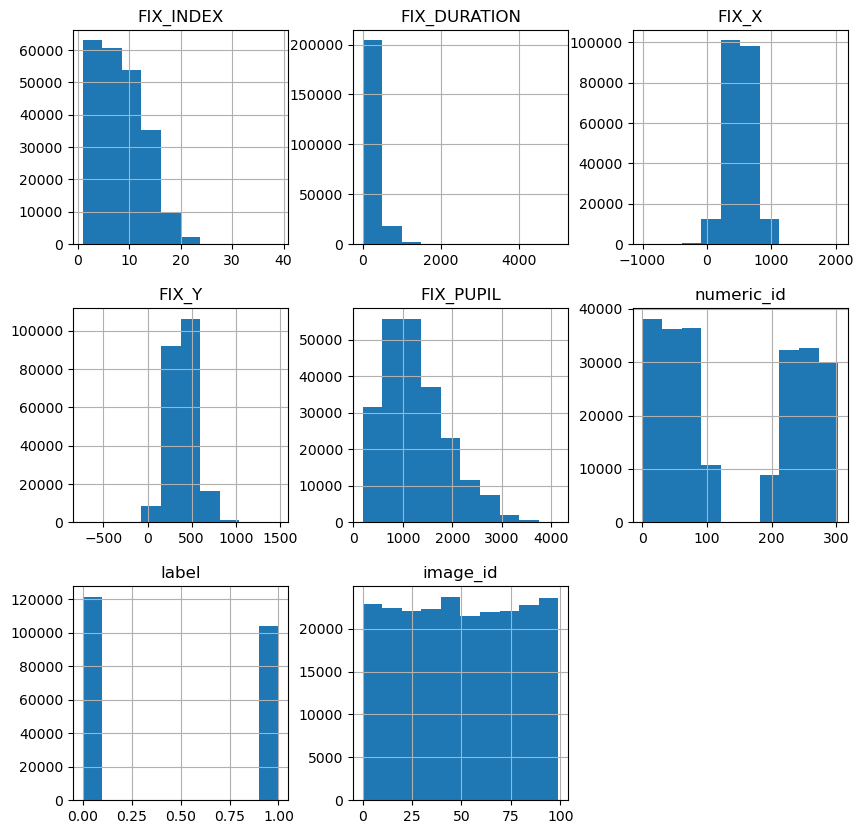

In [6]:
df.hist(figsize=(10, 10))  


# Phân tán duration-puppil theo thời gian

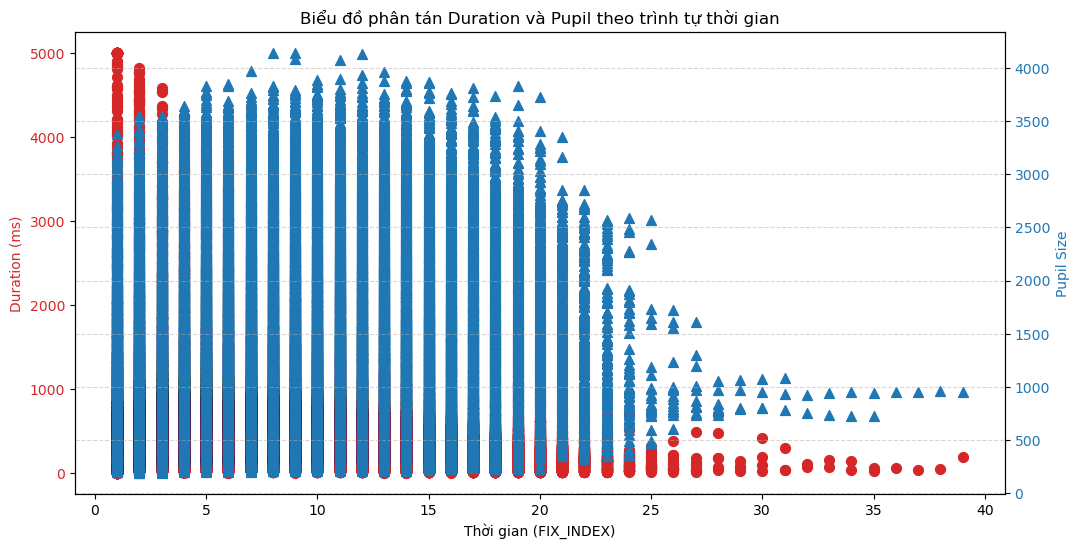

In [7]:
# Tạo figure và trục chính (ax1)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Trục X chung là FIX_INDEX
x = df['FIX_INDEX']

# Vẽ FIX_DURATION lên trục trái (ax1) - Màu đỏ
ax1.scatter(x, df['FIX_DURATION'], color='tab:red', label='Duration', s=50)
ax1.set_xlabel('Thời gian (FIX_INDEX)')
ax1.set_ylabel('Duration (ms)', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Tạo trục phụ (ax2) chia sẻ trục X với ax1
ax2 = ax1.twinx() 

# Vẽ FIX_PUPIL lên trục phải (ax2) - Màu xanh
ax2.scatter(x, df['FIX_PUPIL'], color='tab:blue', label='Pupil', marker='^', s=50) # Dùng hình tam giác
ax2.set_ylabel('Pupil Size', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Biểu đồ phân tán Duration và Pupil theo trình tự thời gian')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

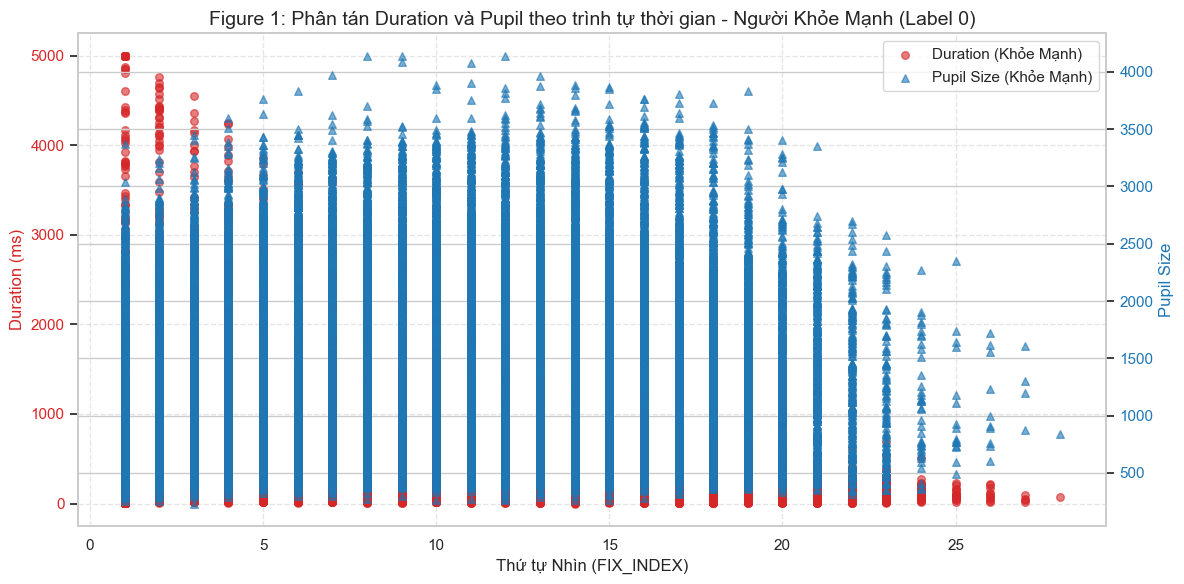

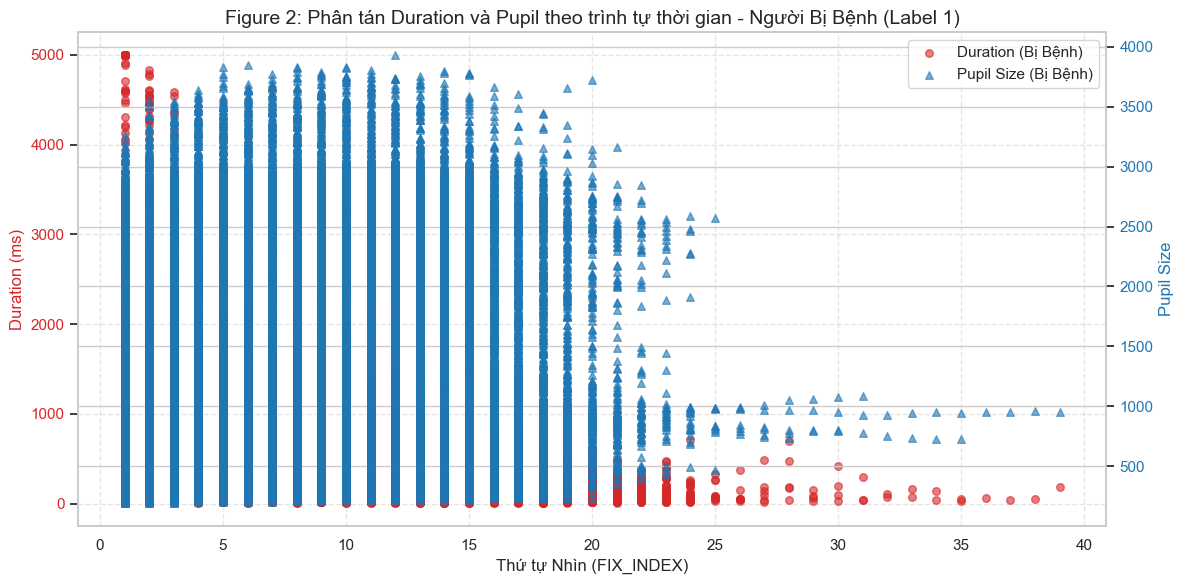

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Tải dữ liệu gốc
df = pd.read_csv('original_file.csv')

# --- 1. Lọc dữ liệu theo từng nhóm ---
df_healthy = df[df['label'] == 0].copy()
df_diseased = df[df['label'] == 1].copy()

# Tên cột X
x_col = 'FIX_INDEX'

# --- 2. Figure 1: Người Khỏe Mạnh (label = 0) ---
fig1, ax1_1 = plt.subplots(figsize=(12, 6))

# Trục trái (FIX_DURATION) - Màu đỏ
ax1_1.scatter(df_healthy[x_col], df_healthy['FIX_DURATION'], color='tab:red', label='Duration (Khỏe Mạnh)', s=30, alpha=0.6)
ax1_1.set_xlabel('Thứ tự Nhìn (FIX_INDEX)', fontsize=12)
ax1_1.set_ylabel('Duration (ms)', color='tab:red', fontsize=12)
ax1_1.tick_params(axis='y', labelcolor='tab:red')

# Trục phụ phải (FIX_PUPIL) - Màu xanh
ax1_2 = ax1_1.twinx() 
ax1_2.scatter(df_healthy[x_col], df_healthy['FIX_PUPIL'], color='tab:blue', label='Pupil Size (Khỏe Mạnh)', marker='^', s=30, alpha=0.6)
ax1_2.set_ylabel('Pupil Size', color='tab:blue', fontsize=12)
ax1_2.tick_params(axis='y', labelcolor='tab:blue')

# Thiết lập tiêu đề và legend
plt.title('Figure 1: Phân tán Duration và Pupil theo trình tự thời gian - Người Khỏe Mạnh (Label 0)', fontsize=14)
# Vị trí legend được điều chỉnh để hiển thị cả 2 label
fig1.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax1_1.transAxes)
ax1_1.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
# plt.savefig('scatter_duration_pupil_healthy.png')


# --- 3. Figure 2: Người Bị Bệnh (Tâm Thần) (label = 1) ---
fig2, ax2_1 = plt.subplots(figsize=(12, 6))

# Trục trái (FIX_DURATION) - Màu đỏ
ax2_1.scatter(df_diseased[x_col], df_diseased['FIX_DURATION'], color='tab:red', label='Duration (Bị Bệnh)', s=30, alpha=0.6)
ax2_1.set_xlabel('Thứ tự Nhìn (FIX_INDEX)', fontsize=12)
ax2_1.set_ylabel('Duration (ms)', color='tab:red', fontsize=12)
ax2_1.tick_params(axis='y', labelcolor='tab:red')

# Trục phụ phải (FIX_PUPIL) - Màu xanh
ax2_2 = ax2_1.twinx() 
ax2_2.scatter(df_diseased[x_col], df_diseased['FIX_PUPIL'], color='tab:blue', label='Pupil Size (Bị Bệnh)', marker='^', s=30, alpha=0.6)
ax2_2.set_ylabel('Pupil Size', color='tab:blue', fontsize=12)
ax2_2.tick_params(axis='y', labelcolor='tab:blue')

# Thiết lập tiêu đề và legend
plt.title('Figure 2: Phân tán Duration và Pupil theo trình tự thời gian - Người Bị Bệnh (Label 1)', fontsize=14)
# Vị trí legend được điều chỉnh để hiển thị cả 2 label
fig2.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax2_1.transAxes)
ax2_1.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
# plt.savefig('scatter_duration_pupil_diseased.png')

# plt.show()

# Duration-Pupil
Vẽ Duration vs Pupil (Màu sắc thể hiện Thời gian)
Cách này giúp bạn xem mối tương quan giữa độ giãn đồng tử và thời gian nhìn, trong đó 
màu sắc của các điểm sẽ thay đổi từ nhạt sang đậm (hoặc đổi màu) theo FIX_INDEX.

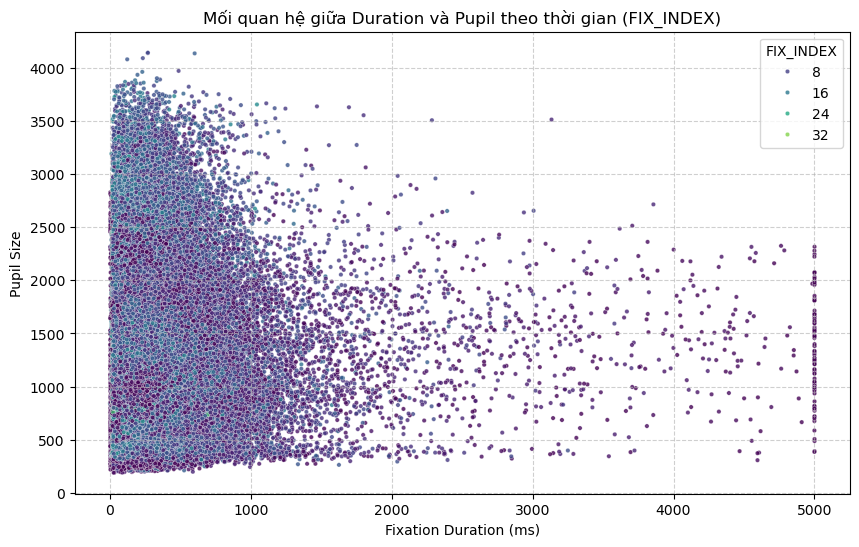

In [ ]:
plt.figure(figsize=(10, 6))

# Vẽ scatter plot
sns.scatterplot(
    data=df, 
    x='FIX_DURATION', 
    y='FIX_PUPIL', 
    hue='FIX_INDEX',    
    palette='viridis',  
    s=10,              
    alpha=0.8          
)

plt.title('Mối quan hệ giữa Duration và Pupil theo thời gian (FIX_INDEX)')
plt.xlabel('Fixation Duration (ms)')
plt.ylabel('Pupil Size')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Duration-fix_index

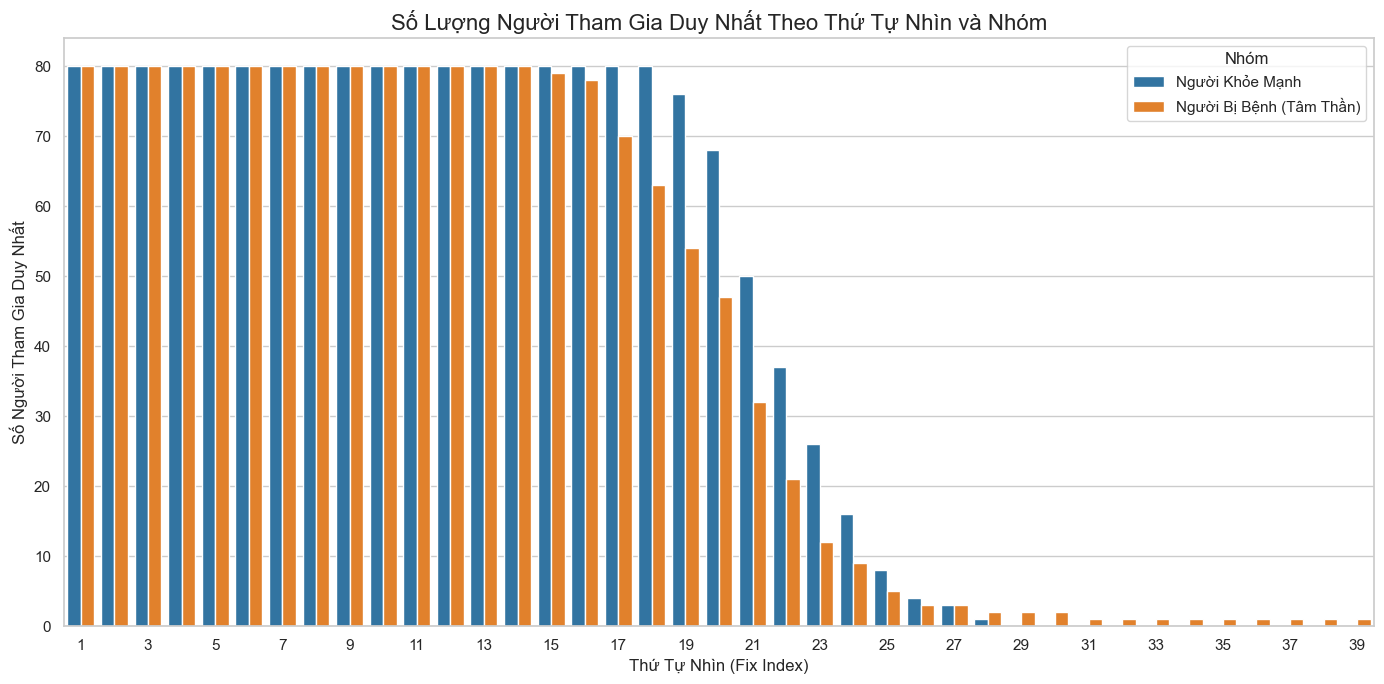

In [ ]:
# --- 1. Tính toán số lượng người tham gia duy nhất theo FIX_INDEX và Label ---
participants_by_group_index = df.groupby(['FIX_INDEX', 'label'])['numeric_id'].nunique().reset_index()

# Đổi tên cột và map nhãn
participants_by_group_index.rename(columns={'numeric_id': 'SO_NGUOI_THAM_GIA_DUY_NHAT'}, inplace=True)
participants_by_group_index['label_text'] = participants_by_group_index['label'].map({0: 'Người Khỏe Mạnh', 1: 'Người Bị Bệnh (Tâm Thần)'})

# --- 2. Tạo Biểu đồ Cột Nhóm (Grouped Bar Chart) ---
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 7))

ax = sns.barplot(
    data=participants_by_group_index,
    x='FIX_INDEX',
    y='SO_NGUOI_THAM_GIA_DUY_NHAT',
    hue='label_text', # Chia cột theo nhóm (label)
    palette={"Người Khỏe Mạnh": "#1f77b4", "Người Bị Bệnh (Tâm Thần)": "#ff7f0e"}
)

# Đặt tiêu đề và nhãn trục
ax.set_title('Số Lượng Người Tham Gia Duy Nhất Theo Thứ Tự Nhìn và Nhóm', fontsize=16)
ax.set_xlabel('Thứ Tự Nhìn (Fix Index)', fontsize=12)
ax.set_ylabel('Số Người Tham Gia Duy Nhất', fontsize=12)

# Đảm bảo các mốc X-axis là số nguyên và không quá dày
max_fix_index = participants_by_group_index['FIX_INDEX'].max()
ax.set_xticks(np.arange(0, max_fix_index, step=2)) 
ax.tick_params(axis='x', rotation=0)

plt.legend(title='Nhóm', loc='upper right')
plt.tight_layout()


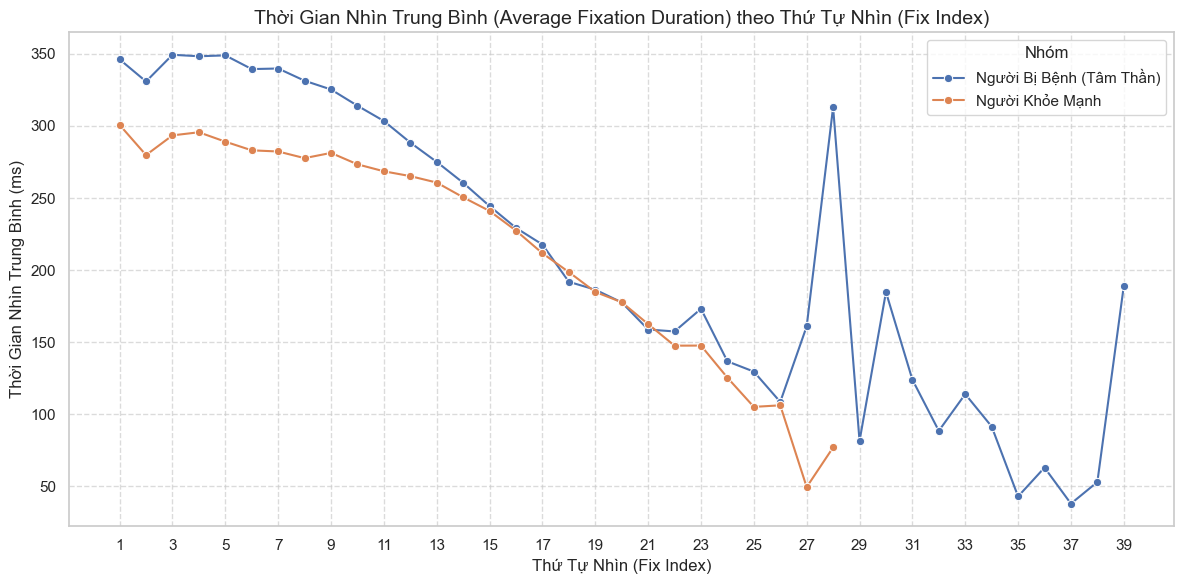

In [ ]:
import numpy as np
df2 = df.copy()
df2['label_text'] = df2['label'].map({0: 'Người Khỏe Mạnh', 1: 'Người Bị Bệnh (Tâm Thần)'})

# Tính giá trị trung bình của FIX_DURATION theo FIX_INDEX và nhãn
avg_df = (
    df2
    .groupby(['FIX_INDEX', 'label_text'])['FIX_DURATION']
    .mean()
    .reset_index(name='AVERAGE_FIX_DURATION')
)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

ax = sns.lineplot(
    data=avg_df,
    x='FIX_INDEX',
    y='AVERAGE_FIX_DURATION',
    hue='label_text',  # Phân biệt bằng màu dựa trên nhãn
    marker='o',        # Thêm điểm đánh dấu cho mỗi FIX_INDEX
    dashes=False
)

ax.set_title('Thời Gian Nhìn Trung Bình (Average Fixation Duration) theo Thứ Tự Nhìn (Fix Index)', fontsize=14)
ax.set_xlabel('Thứ Tự Nhìn (Fix Index)', fontsize=12)
ax.set_ylabel('Thời Gian Nhìn Trung Bình (ms)', fontsize=12)

plt.legend(title='Nhóm', loc='upper right')

max_fix_index = avg_df['FIX_INDEX'].max()
ax.set_xticks(np.arange(1, max_fix_index + 1, step=2))

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

# Loại bỏ outlier - duration-fix_index


In [11]:
import pandas as pd
import numpy as np

# Tải dữ liệu gốc
df = pd.read_csv('original_file.csv')

# --- Loại bỏ Outlier bằng IQR trên FIX_DURATION ---
Q1 = df['FIX_DURATION'].quantile(0.25)
Q3 = df['FIX_DURATION'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Lọc các giá trị nằm trong ngưỡng
df_cleaned = df[
    (df['FIX_DURATION'] >= lower_bound) & 
    (df['FIX_DURATION'] <= upper_bound)
].copy()

# --- Tính lại Thời gian Nhìn Trung bình ---
average_fix_duration_cleaned = df_cleaned.groupby(['label', 'FIX_INDEX'])['FIX_DURATION'].mean().reset_index()
average_fix_duration_cleaned.rename(columns={'FIX_DURATION': 'AVERAGE_FIX_DURATION_CLEANED'}, inplace=True)

# Lưu kết quả đã làm sạch
average_fix_duration_cleaned.to_csv('average_fix_duration_cleaned_data.csv', index=False)

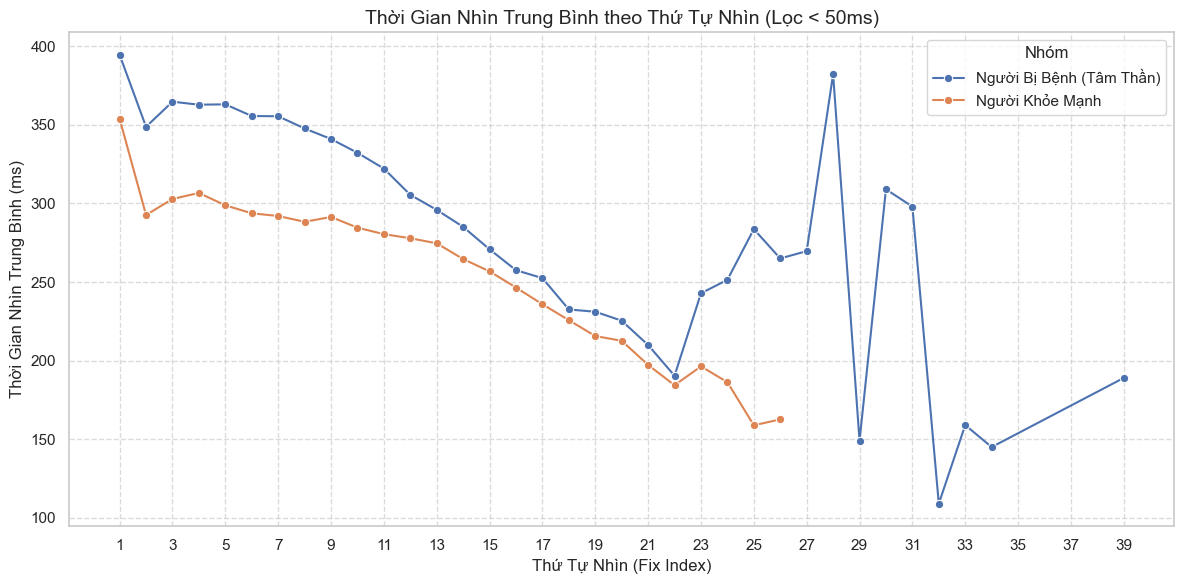

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Tải dữ liệu gốc
df = pd.read_csv('original_file.csv')

# --- ÁP DỤNG FILTER CHUYÊN MÔN: Loại bỏ các điểm có FIX_DURATION < 50 ms ---
df_filtered = df[df['FIX_DURATION'] >= 100].copy()

# Map the label to text
df_filtered['label_text'] = df_filtered['label'].map({0: 'Người Khỏe Mạnh', 1: 'Người Bị Bệnh (Tâm Thần)'})

# Tính giá trị trung bình của FIX_DURATION theo FIX_INDEX và nhãn
avg_df = (
    df_filtered
    .groupby(['FIX_INDEX', 'label_text'])['FIX_DURATION']
    .mean()
    .reset_index(name='AVERAGE_FIX_DURATION')
)


# --- Tạo Biểu đồ Đường mới với dữ liệu đã lọc ---
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

ax = sns.lineplot(
    data=avg_df,
    x='FIX_INDEX',
    y='AVERAGE_FIX_DURATION',
    hue='label_text',
    marker='o',
    dashes=False
)

# Đặt tiêu đề và nhãn trục
ax.set_title('Thời Gian Nhìn Trung Bình theo Thứ Tự Nhìn (Lọc < 50ms)', fontsize=14)
ax.set_xlabel('Thứ Tự Nhìn (Fix Index)', fontsize=12)
ax.set_ylabel('Thời Gian Nhìn Trung Bình (ms)', fontsize=12)

# Điều chỉnh chú thích và trục X
plt.legend(title='Nhóm', loc='upper right')
max_fix_index = avg_df['FIX_INDEX'].max()
ax.set_xticks(np.arange(1, max_fix_index + 1, step=2))

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Lưu hình ảnh
# plt.savefig('average_fix_duration_filtered_50ms_line_chart.png')
plt.show()

# + pupil

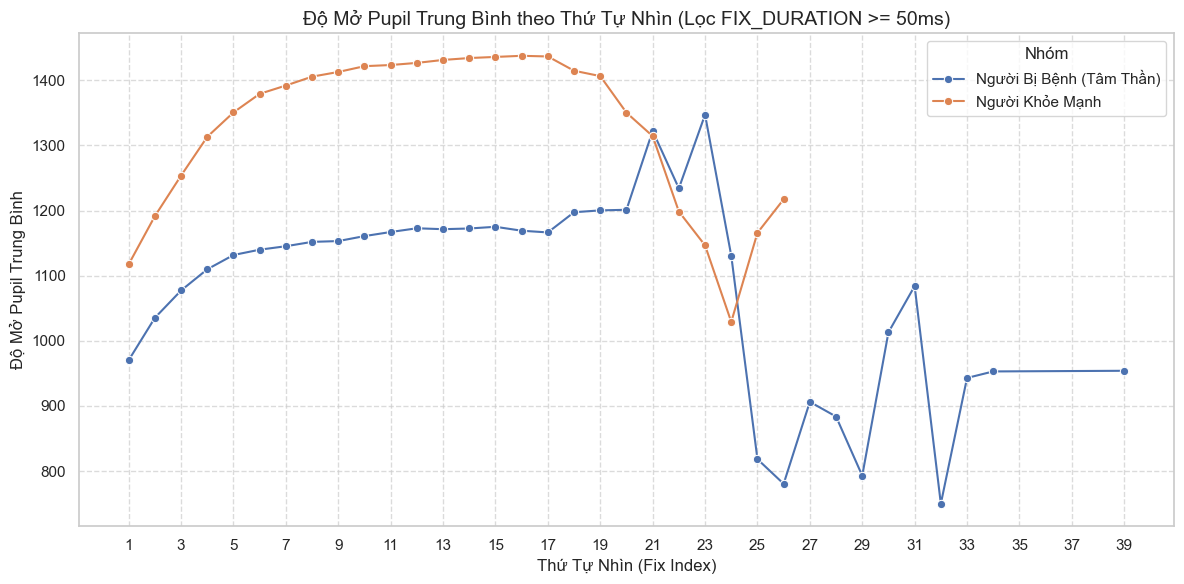

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Tải dữ liệu gốc
df = pd.read_csv('original_file.csv')

# --- 1. ÁP DỤNG FILTER CHUYÊN MÔN: Loại bỏ các điểm có FIX_DURATION < 50 ms ---
df_filtered = df[df['FIX_DURATION'] >= 100].copy()

# Map the label to text
df_filtered['label_text'] = df_filtered['label'].map({0: 'Người Khỏe Mạnh', 1: 'Người Bị Bệnh (Tâm Thần)'})

# --- 2. Tính Trung bình FIX_PUPIL trên dữ liệu đã lọc ---
df_pupil = (
    df_filtered
    .groupby(['FIX_INDEX', 'label_text'])['FIX_PUPIL']
    .mean()
    .reset_index(name='AVERAGE_FIX_PUPIL')
)

# --- 3. Tạo Biểu đồ Đường thể hiện AVERAGE_FIX_PUPIL ---
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

ax = sns.lineplot(
    data=df_pupil,
    x='FIX_INDEX',
    y='AVERAGE_FIX_PUPIL',
    hue='label_text',
    marker='o',
    dashes=False
)

ax.set_title('Độ Mở Pupil Trung Bình theo Thứ Tự Nhìn (Lọc FIX_DURATION >= 50ms)', fontsize=14)
ax.set_xlabel('Thứ Tự Nhìn (Fix Index)', fontsize=12)
ax.set_ylabel('Độ Mở Pupil Trung Bình', fontsize=12)

plt.legend(title='Nhóm', loc='upper right')

max_fix_index = int(df_pupil['FIX_INDEX'].max())
ax.set_xticks(np.arange(1, max_fix_index + 1, step=2))

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Lưu hình ảnh
# plt.savefig('average_pupil_size_filtered_50ms_line_chart.png')
plt.show()

<Axes: >

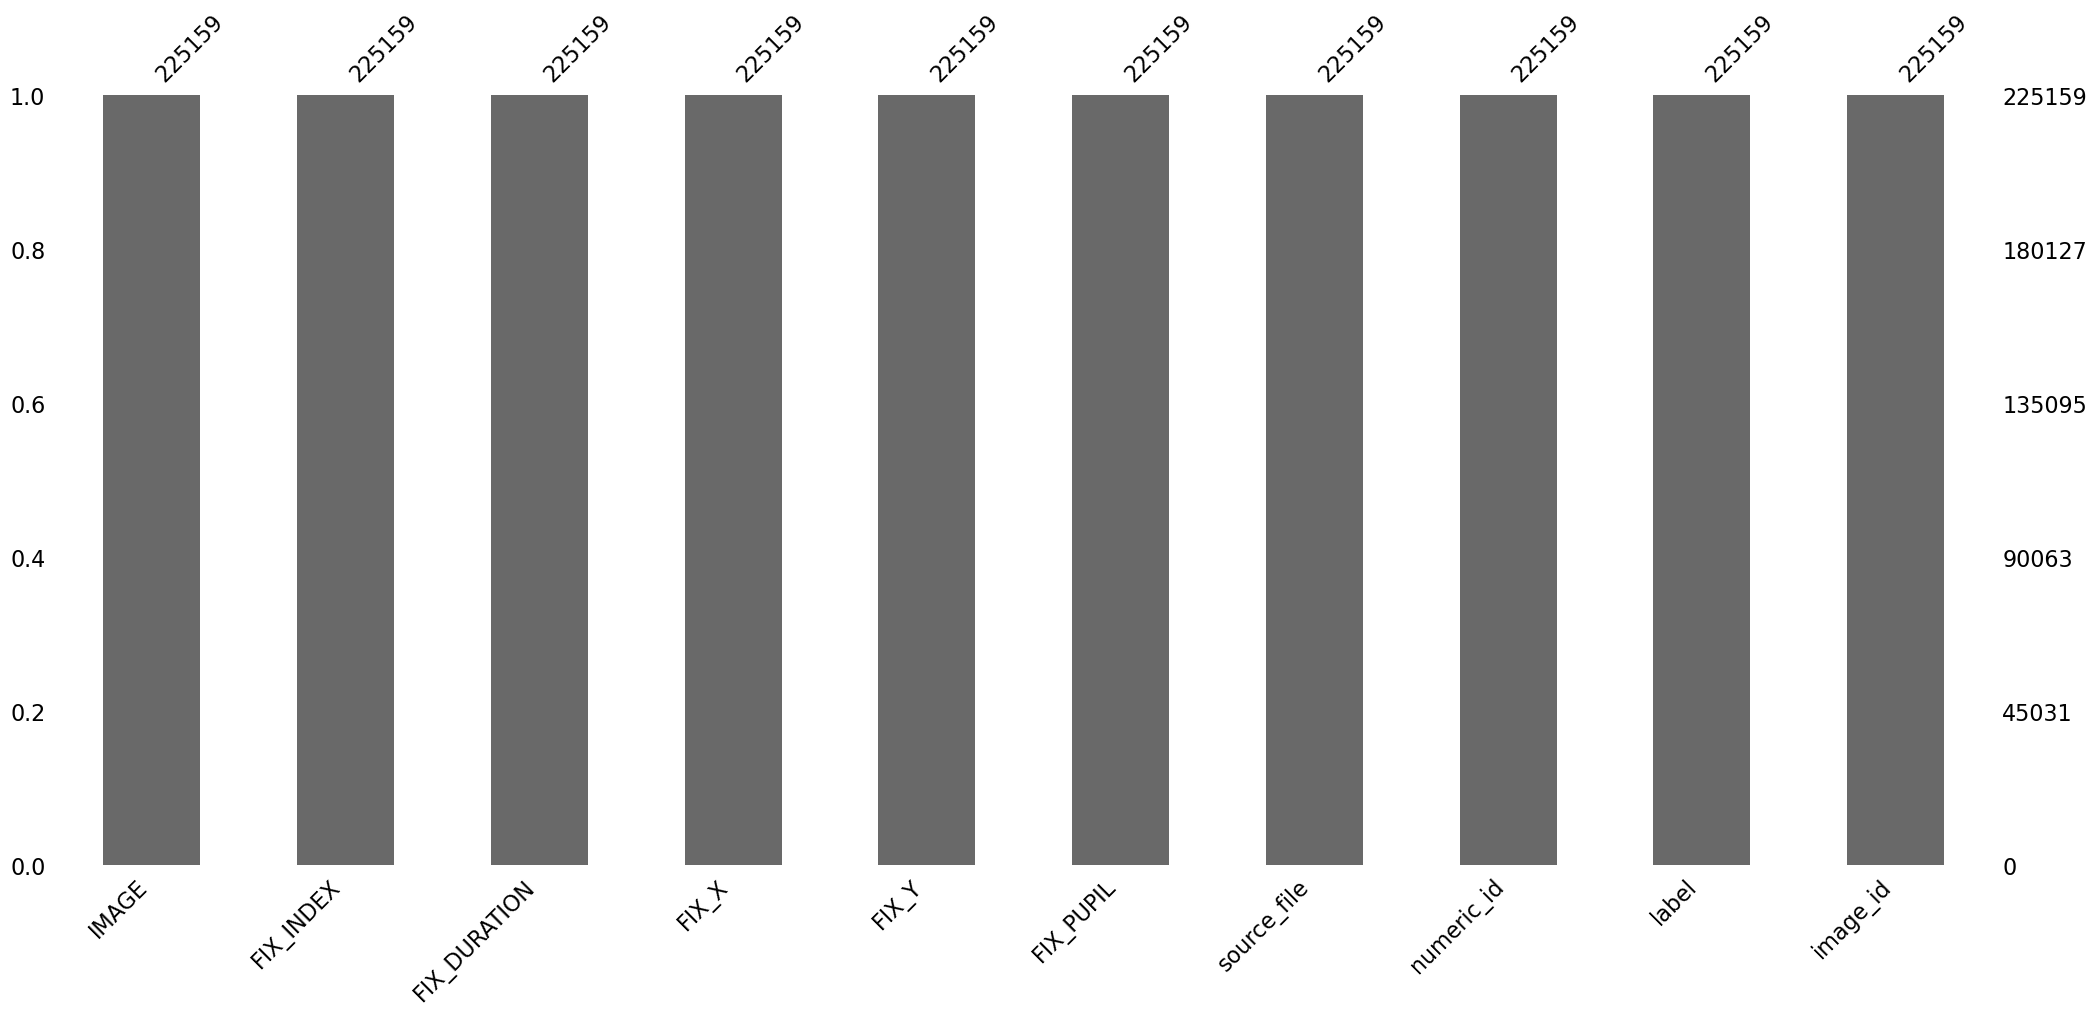

In [11]:
import missingno as msno
msno.bar(df)




Không có dữ liệu missing

In [8]:
corr_mat = df.select_dtypes(include='number').corr(method='pearson')
target_corr = corr_mat['label'].drop(['label', 'numeric_id'])
print(target_corr)

FIX_INDEX      -0.102321
FIX_DURATION    0.092218
FIX_X           0.009354
FIX_Y           0.014235
FIX_PUPIL      -0.175548
image_id       -0.008274
Name: label, dtype: float64


Kích thước dữ liệu sẵn sàng để tính MI: (225159, 6)


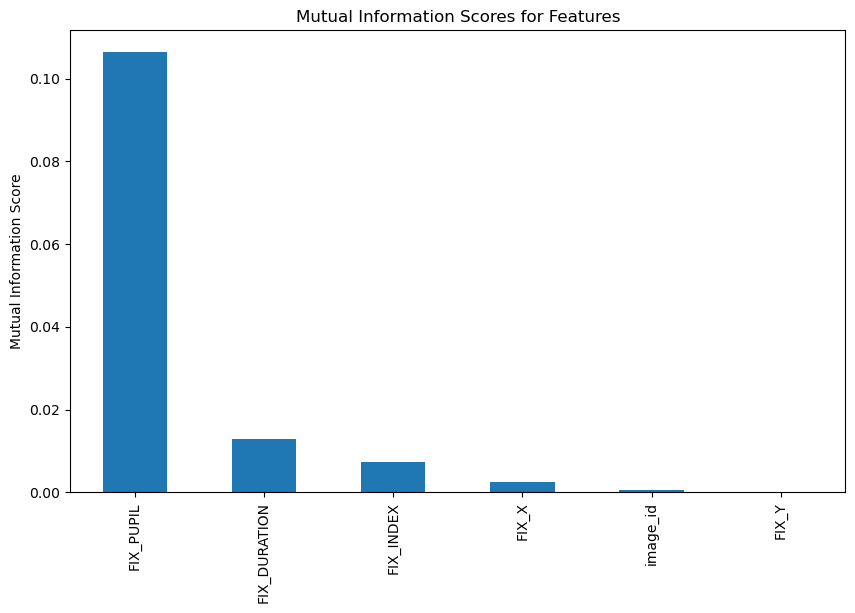


Kết quả Mutual Information Scores (Xếp hạng độ quan trọng):
FIX_PUPIL       0.106347
FIX_DURATION    0.012965
FIX_INDEX       0.007225
FIX_X           0.002527
image_id        0.000580
FIX_Y           0.000152
dtype: float64


In [5]:
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
df2 = df.dropna(subset = ['label'])

X = df2.drop(['label','numeric_id', 'IMAGE', 'source_file'], axis=1)
y = df2['label']    

X_final = X.select_dtypes(include=['number'])
y_final = y[X_final.index]
print(f"Kích thước dữ liệu sẵn sàng để tính MI: {X_final.shape}")

# Sử dụng X_final và y_final đã được làm sạch
mi_scores = mutual_info_regression(X_final, y_final, random_state=0)
mi_series = pd.Series(mi_scores, index=X_final.columns).sort_values(ascending=False)

mi_series.plot.bar(figsize=(10, 6))
plt.ylabel("Mutual Information Score")
plt.title("Mutual Information Scores for Features")
plt.show()
print("\nKết quả Mutual Information Scores (Xếp hạng độ quan trọng):")
print(mi_series)


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.svm import SVC

X = df.drop(columns=['label', 'IMAGE', 'source_file', 'numeric_id'])
y = df['label']
model = LogisticRegression(max_iter=1000)
model2 = SVC()
sfs = SequentialFeatureSelector(model, n_features_to_select=3, direction='forward')
sbs = SequentialFeatureSelector(model, n_features_to_select=3, direction='backward')
sfs.fit(X, y)
sbs.fit(X,y)
selected_feature_for = X.columns[sfs.get_support()]
selected_feature_back = X.columns[sbs.get_support()]
print(selected_feature_for)
print(selected_feature_back)

Index(['FIX_DURATION', 'FIX_PUPIL', 'image_id'], dtype='object')
Index(['FIX_DURATION', 'FIX_PUPIL', 'image_id'], dtype='object')


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # X_scaled là numpy array
sfs = SequentialFeatureSelector(model, n_features_to_select=3, direction='forward')
sbs = SequentialFeatureSelector(model, n_features_to_select=3, direction='backward')
sfs.fit(X_scaled, y) 
sbs.fit(X_scaled,y)
print(X.columns[sfs.get_support()])
print(X.columns[sbs.get_support()])


Index(['FIX_DURATION', 'FIX_PUPIL', 'image_id'], dtype='object')
Index(['FIX_DURATION', 'FIX_PUPIL', 'image_id'], dtype='object')
